# **Predict Translation Word & Char Count**

> Prediction of translated Word/Char Count is used as a Quality and/or Validation Check
- toc: true
- branch: master
- badges: false
- comments: true
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2
- image: images/PredictTranslationWordAndCharCount.png
- categories: [Deep Learning,Time series,Regression,   Python,fastai]
- show_tags: true

In [ ]:
#hide
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'TODANALYTICS/'
# base_dir = ""

Mounted at /content/gdrive


In [ ]:
# # ! pip install fastai
# ! pip install fastai2
# ! pip install nbdev

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 9.1MB/s 
     |████████████████████████████████| 194kB 46.6MB/s 
     |████████████████████████████████| 1.0MB 40.6MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 40kB 5.3MB/s 
     |████████████████████████████████| 92kB 9.5MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 2.6MB 57.3MB/s 


In [ ]:
# ! pip list | grep fastai
! pip list | grep fastai2

In [ ]:
from fastai.tabular.all import *
from fastbook import *

# from fastai.tabular.all import *
# # from fastai2.tabular.all import *

In [ ]:
import seaborn as sns
# import os
# import json
%matplotlib inline

In [ ]:
!python --version

Python 3.6.9


In [ ]:
# PATH='./'
PATH = Path(base_dir + './'); PATH

Path('/content/gdrive/My Drive/TODANALYTICS')

# Get train/valid data

In [ ]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

## Ingest all E-contributions

In [ ]:
# df_E = pd.read_csv(f'{PATH}/contributions/1955-0807y_Pride_ENG_15-0401-b_E-contributions.csv', sep='~')
# df_E = pd.read_csv(f'{PATH}/contributions/1965-0829_SatansEden_ENG_15-1104-b_E-contributions.csv', sep='~')

all_files = glob.glob(f"{PATH}/contributions/*E-contributions.csv")
li = []
for filename in all_files:
    dft = pd.read_csv(filename, index_col=None, header=0, sep='~')
    li.append(dft)
df_E = pd.concat(li, axis=0, ignore_index=True)

df_E

,m_descriptor,t_lan,t_senc,t_version,s_typ,s_rsen,e_id,e_top,be_id,be_top,c_id,c_created_at,c_kind,c_eis,c_base,a_role,u_name,e_content
0,1965-0418x,ENG,1870,18-0101-E1R,n,1,174684,Z,NaN,NaN,224461,2018-03-29 23:10:24.573038,E,0,NaN,EP,kobest,Let us bow our heads.
1,1965-0418x,ENG,1870,18-0101-E1R,n,2,174685,Z,NaN,NaN,224462,2018-03-29 23:10:24.595501,E,0,NaN,EP,kobest,"Lord, as we gather here this fine Easter morning, see the little buds pressing their way out, the bees flying in and getting their portion, the birds singing like their hearts would burst with joy, because there is an Easter."
2,1965-0418x,ENG,1870,18-0101-E1R,n,3,174686,Z,NaN,NaN,224463,2018-03-29 23:10:24.628362,E,0,NaN,EP,kobest,"We believe that You raised up Jesus from the dead, many years ago, today, and we celebrate this memorial day."
3,1965-0418x,ENG,1870,18-0101-E1R,n,4,174687,Z,NaN,NaN,224464,2018-03-29 23:10:24.650119,E,0,NaN,EP,kobest,"And let there come an Easter among us all, today."
4,1965-0418x,ENG,1870,18-0101-E1R,n,5,174688,Z,NaN,NaN,224465,2018-03-29 23:10:24.670806,E,0,NaN,EP,kobest,"May we, as His servants, understand His Word, that we were in His fellowship then, and that now that we are risen with Him and setting together in Heavenly places."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167284,CAB-06,ENG,835,18-1101-b,n,831,493574,Z,NaN,NaN,707747,2019-08-31 17:09:28.899814,E,0,NaN,EP,kobest,What else could we desire above Jesus Himself?
167285,CAB-06,ENG,835,18-1101-b,n,832,493575,Z,NaN,NaN,707748,2019-08-31 17:09:28.916381,E,0,NaN,EP,kobest,"Is He not everything, even Perfect Everything?"
167286,CAB-06,ENG,835,18-1101-b,n,833,493576,Z,NaN,NaN,707749,2019-08-31 17:09:28.933088,E,0,NaN,EP,kobest,He that hath an ear let him hear what the Spirit saith to the churches.
167287,CAB-06,ENG,835,18-1101-b,n,834,493577,Z,NaN,NaN,707750,2019-08-31 17:09:28.949515,E,0,NaN,EP,kobest,Amen.


In [ ]:
#remove if not used to debug
df_E = df_E.drop(['e_id','t_senc','s_typ','e_top','be_id','be_top','c_created_at','c_kind','c_eis','c_base','a_role','u_name'], axis=1) #each record now unique
df_E

,m_descriptor,t_lan,t_version,s_rsen,c_id,e_content
0,1965-0418x,ENG,18-0101-E1R,1,224461,Let us bow our heads.
1,1965-0418x,ENG,18-0101-E1R,2,224462,"Lord, as we gather here this fine Easter morning, see the little buds pressing their way out, the bees flying in and getting their portion, the birds singing like their hearts would burst with joy, because there is an Easter."
2,1965-0418x,ENG,18-0101-E1R,3,224463,"We believe that You raised up Jesus from the dead, many years ago, today, and we celebrate this memorial day."
3,1965-0418x,ENG,18-0101-E1R,4,224464,"And let there come an Easter among us all, today."
4,1965-0418x,ENG,18-0101-E1R,5,224465,"May we, as His servants, understand His Word, that we were in His fellowship then, and that now that we are risen with Him and setting together in Heavenly places."
...,...,...,...,...,...,...
167284,CAB-06,ENG,18-1101-b,831,707747,What else could we desire above Jesus Himself?
167285,CAB-06,ENG,18-1101-b,832,707748,"Is He not everything, even Perfect Everything?"
167286,CAB-06,ENG,18-1101-b,833,707749,He that hath an ear let him hear what the Spirit saith to the churches.
167287,CAB-06,ENG,18-1101-b,834,707750,Amen.


In [ ]:
#handle NaNs in e_content
e_content_nans = df_E['e_content'].isna()
df_E[e_content_nans]

,m_descriptor,t_lan,t_version,s_rsen,c_id,e_content
33415,1956-0805,ENG,15-0402-b,1176,454335,NaN
43018,1957-0419,ENG,15-0401-b,505,13306,NaN


In [ ]:
#replace e_content NaNs with empty strings
df_E.loc[e_content_nans, 'e_content'] = ''
# df_E.loc[e_content_nans, ['e_content']]
# OR
df_E[df_E['e_content']=='']

,m_descriptor,t_lan,t_version,s_rsen,c_id,e_content
33415,1956-0805,ENG,15-0402-b,1176,454335,
43018,1957-0419,ENG,15-0401-b,505,13306,


In [ ]:
#add chars column
df_E['chars'] = [len(e) for e in df_E['e_content']]
# df_E['chars'] = [len(e) if type(e)==str else 1 for e in df_E['e_content']]
df_E

,m_descriptor,t_lan,t_version,s_rsen,c_id,e_content,chars
0,1965-0418x,ENG,18-0101-E1R,1,224461,Let us bow our heads.,21
1,1965-0418x,ENG,18-0101-E1R,2,224462,"Lord, as we gather here this fine Easter morning, see the little buds pressing their way out, the bees flying in and getting their portion, the birds singing like their hearts would burst with joy, because there is an Easter.",225
2,1965-0418x,ENG,18-0101-E1R,3,224463,"We believe that You raised up Jesus from the dead, many years ago, today, and we celebrate this memorial day.",109
3,1965-0418x,ENG,18-0101-E1R,4,224464,"And let there come an Easter among us all, today.",49
4,1965-0418x,ENG,18-0101-E1R,5,224465,"May we, as His servants, understand His Word, that we were in His fellowship then, and that now that we are risen with Him and setting together in Heavenly places.",163
...,...,...,...,...,...,...,...
167284,CAB-06,ENG,18-1101-b,831,707747,What else could we desire above Jesus Himself?,46
167285,CAB-06,ENG,18-1101-b,832,707748,"Is He not everything, even Perfect Everything?",46
167286,CAB-06,ENG,18-1101-b,833,707749,He that hath an ear let him hear what the Spirit saith to the churches.,71
167287,CAB-06,ENG,18-1101-b,834,707750,Amen.,5


In [ ]:
# df_E.loc[e_content_nans, ['e_content','chars']]
# OR
df_E[df_E['chars']==0]

,m_descriptor,t_lan,t_version,s_rsen,c_id,e_content,chars
33415,1956-0805,ENG,15-0402-b,1176,454335,,0
43018,1957-0419,ENG,15-0401-b,505,13306,,0


In [ ]:
#add words column
#https://www.geeksforgeeks.org/python-program-to-count-words-in-a-sentence/
df_E['words'] = [len(re.findall(r'\w+', e)) for e in df_E['e_content']]
df_E

,m_descriptor,t_lan,t_version,s_rsen,c_id,e_content,chars,words
0,1965-0418x,ENG,18-0101-E1R,1,224461,Let us bow our heads.,21,5
1,1965-0418x,ENG,18-0101-E1R,2,224462,"Lord, as we gather here this fine Easter morning, see the little buds pressing their way out, the bees flying in and getting their portion, the birds singing like their hearts would burst with joy, because there is an Easter.",225,40
2,1965-0418x,ENG,18-0101-E1R,3,224463,"We believe that You raised up Jesus from the dead, many years ago, today, and we celebrate this memorial day.",109,20
3,1965-0418x,ENG,18-0101-E1R,4,224464,"And let there come an Easter among us all, today.",49,10
4,1965-0418x,ENG,18-0101-E1R,5,224465,"May we, as His servants, understand His Word, that we were in His fellowship then, and that now that we are risen with Him and setting together in Heavenly places.",163,30
...,...,...,...,...,...,...,...,...
167284,CAB-06,ENG,18-1101-b,831,707747,What else could we desire above Jesus Himself?,46,8
167285,CAB-06,ENG,18-1101-b,832,707748,"Is He not everything, even Perfect Everything?",46,7
167286,CAB-06,ENG,18-1101-b,833,707749,He that hath an ear let him hear what the Spirit saith to the churches.,71,15
167287,CAB-06,ENG,18-1101-b,834,707750,Amen.,5,1


In [ ]:
#remove BER from t_version
df_E['t_version'] = ['-'.join(e.split('-')[:2]) for e in df_E['t_version']]
df_E

,m_descriptor,t_lan,t_version,s_rsen,c_id,e_content,chars,words
0,1965-0418x,ENG,18-0101,1,224461,Let us bow our heads.,21,5
1,1965-0418x,ENG,18-0101,2,224462,"Lord, as we gather here this fine Easter morning, see the little buds pressing their way out, the bees flying in and getting their portion, the birds singing like their hearts would burst with joy, because there is an Easter.",225,40
2,1965-0418x,ENG,18-0101,3,224463,"We believe that You raised up Jesus from the dead, many years ago, today, and we celebrate this memorial day.",109,20
3,1965-0418x,ENG,18-0101,4,224464,"And let there come an Easter among us all, today.",49,10
4,1965-0418x,ENG,18-0101,5,224465,"May we, as His servants, understand His Word, that we were in His fellowship then, and that now that we are risen with Him and setting together in Heavenly places.",163,30
...,...,...,...,...,...,...,...,...
167284,CAB-06,ENG,18-1101,831,707747,What else could we desire above Jesus Himself?,46,8
167285,CAB-06,ENG,18-1101,832,707748,"Is He not everything, even Perfect Everything?",46,7
167286,CAB-06,ENG,18-1101,833,707749,He that hath an ear let him hear what the Spirit saith to the churches.,71,15
167287,CAB-06,ENG,18-1101,834,707750,Amen.,5,1


## Ingest all V-contributions

In [ ]:
# df_V = pd.read_csv(f'{PATH}/contributions/1955-0807y_Pride_CHN_15-0401-h_V-contributions.csv', sep='~')
# df_V = pd.read_csv(f'{PATH}/contributions/1965-0829_SatansEden_FIJ_15-1104-B123_V-contributions.csv', sep='~')

all_files = glob.glob(f"{PATH}/contributions/*V-contributions.csv")
li = []
for filename in all_files:
    dft = pd.read_csv(filename, index_col=None, header=0, sep='~')
    li.append(dft)
df_V = pd.concat(li, axis=0, ignore_index=True)

df_V

,m_descriptor,t_lan,t_senc,t_version,s_typ,s_rsen,e_id,e_top,be_id,be_top,c_id,c_created_at,c_kind,c_eis,c_base,a_role,u_name,e_content
0,1965-0418x,AFR,1870,18-0101-B123E1R,n,1,181444,M,181444.0,M,844713,2020-01-15 02:13:34.847562,V,11,a,CE,engest,Laat ons ons hoofde buig.
1,1965-0418x,AFR,1870,18-0101-B123E1R,n,1,181444,M,181444.0,M,256723,2018-04-23 11:04:31.787641,V,28,a,TE,linoli,Laat ons ons hoofde buig.
2,1965-0418x,AFR,1870,18-0101-B123E1R,n,2,339948,T,200635.0,N,468379,2019-01-30 22:21:29.62162,V,0,c,CE,engest,"Here, soos ons hier vergader op hierdie mooi Paasfees oggend, sien die botsels uitloop, die bye wat in vlieg en hulle gedeelte kry, die voëls wat sing asof hulle harte wil bars van vreugde, omdat daar 'n Paasfees is."
3,1965-0418x,AFR,1870,18-0101-B123E1R,n,2,200635,N,181445.0,N,256725,2018-04-23 11:23:43.781013,V,0,c,TE,linoli,"Here, soos ons hier vergader op hierdie mooi Paasfees oggend, sien die botsels uitloop, die bye wat in vlieg en hulle gedeelte kry, die voëls wat sing asof hulle harte wil bars van vreugde, omdat daar 'n Pase is."
4,1965-0418x,AFR,1870,18-0101-B123E1R,n,3,200637,M,200636.0,N,256727,2018-04-23 11:26:37.965897,V,0,c,TE,linoli,"Ons glo dat U Jesus opgewek het uit die dode, baie jare gelede, en vandag vier ons hierdie aandenking."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382737,CAB-06,AFR,835,18-1101-B123,n,833,610356,M,610356.0,M,1061632,2020-05-25 02:44:38.590448,V,12,t,CE,engest,Hy wat 'n oor het laat hom hoor wat die Gees aan die gemeentes sê.
382738,CAB-06,AFR,835,18-1101-B123,n,834,610357,M,610357.0,M,1061633,2020-05-25 02:44:42.21845,V,3,t,CE,engest,Amen.
382739,CAB-06,AFR,835,18-1101-B123,n,834,610357,M,494412.0,N,874368,2020-02-02 00:24:14.79957,V,0,c,TE,tilvan,Amen.
382740,CAB-06,AFR,835,18-1101-B123,n,835,610358,M,610358.0,M,1061634,2020-05-25 02:44:56.991446,V,14,t,CE,engest,"Selfs so, Here God, deur U Gees, laat ons U waarheid hoor."


In [ ]:
# print(df_V['be_top'].unique())
# df_V[df_V['be_top'].isna()] #are these due to a bug???
# df_V[df_V['e_top'].isna()]

In [ ]:
#remove if not used to debug
# df_V = df_V.drop(['t_senc','s_typ','e_id','be_id','be_top','c_created_at','c_eis','c_base'], axis=1)
df_V = df_V.drop(['t_senc','s_typ','be_id','c_eis'], axis=1)
df_V

,m_descriptor,t_lan,t_version,s_rsen,e_id,e_top,be_top,c_id,c_created_at,c_kind,c_base,a_role,u_name,e_content
0,1965-0418x,AFR,18-0101-B123E1R,1,181444,M,M,844713,2020-01-15 02:13:34.847562,V,a,CE,engest,Laat ons ons hoofde buig.
1,1965-0418x,AFR,18-0101-B123E1R,1,181444,M,M,256723,2018-04-23 11:04:31.787641,V,a,TE,linoli,Laat ons ons hoofde buig.
2,1965-0418x,AFR,18-0101-B123E1R,2,339948,T,N,468379,2019-01-30 22:21:29.62162,V,c,CE,engest,"Here, soos ons hier vergader op hierdie mooi Paasfees oggend, sien die botsels uitloop, die bye wat in vlieg en hulle gedeelte kry, die voëls wat sing asof hulle harte wil bars van vreugde, omdat daar 'n Paasfees is."
3,1965-0418x,AFR,18-0101-B123E1R,2,200635,N,N,256725,2018-04-23 11:23:43.781013,V,c,TE,linoli,"Here, soos ons hier vergader op hierdie mooi Paasfees oggend, sien die botsels uitloop, die bye wat in vlieg en hulle gedeelte kry, die voëls wat sing asof hulle harte wil bars van vreugde, omdat daar 'n Pase is."
4,1965-0418x,AFR,18-0101-B123E1R,3,200637,M,N,256727,2018-04-23 11:26:37.965897,V,c,TE,linoli,"Ons glo dat U Jesus opgewek het uit die dode, baie jare gelede, en vandag vier ons hierdie aandenking."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382737,CAB-06,AFR,18-1101-B123,833,610356,M,M,1061632,2020-05-25 02:44:38.590448,V,t,CE,engest,Hy wat 'n oor het laat hom hoor wat die Gees aan die gemeentes sê.
382738,CAB-06,AFR,18-1101-B123,834,610357,M,M,1061633,2020-05-25 02:44:42.21845,V,t,CE,engest,Amen.
382739,CAB-06,AFR,18-1101-B123,834,610357,M,N,874368,2020-02-02 00:24:14.79957,V,c,TE,tilvan,Amen.
382740,CAB-06,AFR,18-1101-B123,835,610358,M,M,1061634,2020-05-25 02:44:56.991446,V,t,CE,engest,"Selfs so, Here God, deur U Gees, laat ons U waarheid hoor."


In [ ]:
#verify all TE/CE
# df_V[df_V['a_role']=='TE']
# df_V[df_V['a_role']=='CE']

In [ ]:
#keep only top edits
# df_V['e_top'].unique()
df_V[~df_V['e_top'].isin(['M','T'])] #show others first before reassigning df

,m_descriptor,t_lan,t_version,s_rsen,e_id,e_top,be_top,c_id,c_created_at,c_kind,c_base,a_role,u_name,e_content
3,1965-0418x,AFR,18-0101-B123E1R,2,200635,N,N,256725,2018-04-23 11:23:43.781013,V,c,TE,linoli,"Here, soos ons hier vergader op hierdie mooi Paasfees oggend, sien die botsels uitloop, die bye wat in vlieg en hulle gedeelte kry, die voëls wat sing asof hulle harte wil bars van vreugde, omdat daar 'n Pase is."
7,1965-0418x,AFR,18-0101-B123E1R,4,200638,N,N,256730,2018-04-23 11:31:35.950348,V,c,TE,linoli,"En laat daar tussen ons almal ,'n Pase kom vandag."
8,1965-0418x,AFR,18-0101-B123E1R,5,200639,N,N,256732,2018-04-23 11:43:02.365621,V,c,TE,linoli,"Mag ons, as Sy diensknegte, Sy Woord verstaan, dat ons in Sy gemeenskap was, en dat ons nou saam met Hom opgestaan het en saam sit in Hemelse plekke."
14,1965-0418x,AFR,18-0101-B123E1R,8,200640,N,N,256736,2018-04-23 11:45:23.928111,V,c,TE,linoli,"Mag dit ook ’n Pase wees vir hulle, en ’n eksodus van siekte tot krag."
23,1965-0418x,AFR,18-0101-B123E1R,12,200641,N,N,256741,2018-04-23 11:52:51.171064,V,c,TE,linoli,"Ek beskou hierdie beslis as ’n wonderlike voorreg, vanmôre om terug te wees hier in Jeffersonville, Indiana, met hierdie groot gemeente, die kerk gepak en staan in en om buitekant, in die parkeer area en oral."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382705,CAB-06,AFR,18-1101-B123,817,610338,N,N,874332,2020-02-02 00:04:25.814695,V,c,TE,tilvan,Hulle word ook sterre genoem omdat hulle 'houers' van lig is in die aandtyd.
382706,CAB-06,AFR,18-1101-B123,818,610339,N,N,874334,2020-02-02 00:04:55.254216,V,c,TE,tilvan,"Daarom in die donker van sonde, bring hulle die lig van God na Sy mense."
382724,CAB-06,AFR,18-1101-B123,827,610348,N,N,874352,2020-02-02 00:16:15.338023,V,c,TE,tilvan,Hy sal nie die sterre gebruik (boodskappers) om lig te gee in duisternis nie.
382728,CAB-06,AFR,18-1101-B123,829,610350,N,N,874356,2020-02-02 00:18:14.532886,V,c,TE,tilvan,Dit is die môrester wat sigbaar is wanneer die lig van die son begin skyn.


In [ ]:
#keep only top edits
# df_V[df_V['e_top'].isin(['M','T'])] #Majority & Tie
df_V = df_V[df_V['e_top'].isin(['M','T'])] #Majority & Tie
df_V

,m_descriptor,t_lan,t_version,s_rsen,e_id,e_top,be_top,c_id,c_created_at,c_kind,c_base,a_role,u_name,e_content
0,1965-0418x,AFR,18-0101-B123E1R,1,181444,M,M,844713,2020-01-15 02:13:34.847562,V,a,CE,engest,Laat ons ons hoofde buig.
1,1965-0418x,AFR,18-0101-B123E1R,1,181444,M,M,256723,2018-04-23 11:04:31.787641,V,a,TE,linoli,Laat ons ons hoofde buig.
2,1965-0418x,AFR,18-0101-B123E1R,2,339948,T,N,468379,2019-01-30 22:21:29.62162,V,c,CE,engest,"Here, soos ons hier vergader op hierdie mooi Paasfees oggend, sien die botsels uitloop, die bye wat in vlieg en hulle gedeelte kry, die voëls wat sing asof hulle harte wil bars van vreugde, omdat daar 'n Paasfees is."
4,1965-0418x,AFR,18-0101-B123E1R,3,200637,M,N,256727,2018-04-23 11:26:37.965897,V,c,TE,linoli,"Ons glo dat U Jesus opgewek het uit die dode, baie jare gelede, en vandag vier ons hierdie aandenking."
5,1965-0418x,AFR,18-0101-B123E1R,3,200637,M,M,468380,2019-01-30 22:21:51.780404,V,t,CE,engest,"Ons glo dat U Jesus opgewek het uit die dode, baie jare gelede, en vandag vier ons hierdie aandenking."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382737,CAB-06,AFR,18-1101-B123,833,610356,M,M,1061632,2020-05-25 02:44:38.590448,V,t,CE,engest,Hy wat 'n oor het laat hom hoor wat die Gees aan die gemeentes sê.
382738,CAB-06,AFR,18-1101-B123,834,610357,M,M,1061633,2020-05-25 02:44:42.21845,V,t,CE,engest,Amen.
382739,CAB-06,AFR,18-1101-B123,834,610357,M,N,874368,2020-02-02 00:24:14.79957,V,c,TE,tilvan,Amen.
382740,CAB-06,AFR,18-1101-B123,835,610358,M,M,1061634,2020-05-25 02:44:56.991446,V,t,CE,engest,"Selfs so, Here God, deur U Gees, laat ons U waarheid hoor."


In [ ]:
df_V.sort_values(by=['m_descriptor', 't_lan','t_version','s_rsen','c_created_at'])

,m_descriptor,t_lan,t_version,s_rsen,e_id,e_top,be_top,c_id,c_created_at,c_kind,c_base,a_role,u_name,e_content
6405,1948-0304,GER,15-0902-B123,1,464917,M,NaN,662736,2019-07-30 13:44:14.904495,V,c,TE,hugmes,"Gehen Sie jetzt nicht von hier weg und sagen Sie: „Bruder Branham sagte, es sind zehn Jahre bis zur Entrückung."""
6406,1948-0304,GER,15-0902-B123,2,456140,M,M,662737,2019-07-30 13:44:34.151158,V,a,TE,hugmes,Ich weiß nicht; niemand tut.
6407,1948-0304,GER,15-0902-B123,3,456141,M,M,662738,2019-07-30 13:44:45.966924,V,a,TE,hugmes,Nicht einmal die Engel des Himmels kennt.
6408,1948-0304,GER,15-0902-B123,4,456142,M,M,662739,2019-07-30 13:44:53.096079,V,a,TE,hugmes,Ich weiß es nicht.
6409,1948-0304,GER,15-0902-B123,5,457312,M,N,662741,2019-07-30 13:45:56.611909,V,c,TE,hugmes,"Aber ich weiß, dass es in der Nähe schrecklich wird, denn die Anzeichen, die Er sagte, würden stattfinden."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382737,CAB-06,AFR,18-1101-B123,833,610356,M,M,1061632,2020-05-25 02:44:38.590448,V,t,CE,engest,Hy wat 'n oor het laat hom hoor wat die Gees aan die gemeentes sê.
382739,CAB-06,AFR,18-1101-B123,834,610357,M,N,874368,2020-02-02 00:24:14.79957,V,c,TE,tilvan,Amen.
382738,CAB-06,AFR,18-1101-B123,834,610357,M,M,1061633,2020-05-25 02:44:42.21845,V,t,CE,engest,Amen.
382741,CAB-06,AFR,18-1101-B123,835,610358,M,N,874370,2020-02-02 00:24:42.429672,V,c,TE,tilvan,"Selfs so, Here God, deur U Gees, laat ons U waarheid hoor."


In [ ]:
df_V = df_V.groupby(['m_descriptor', 't_lan','t_version','s_rsen']).agg({'e_top':'last', 'be_top':'last', 'c_created_at':['last','count'], 'c_kind':'last', 'c_base':'last', 'a_role':'last', 'u_name':'last', 'e_content':'last'})
df_V

e_top be_top  \
                                        last   last   
m_descriptor t_lan t_version    s_rsen                
1948-0304    GER   15-0902-B123 1          M    NaN   
                                2          M      M   
                                3          M      M   
                                4          M      M   
                                5          M      N   
...                                      ...    ...   
CAB-06       AFR   18-1101-B123 831        T      N   
                                832        M      M   
                                833        M      M   
                                834        M      N   
                                835        M      N   

                                                      c_created_at        \
                                                              last count   
m_descriptor t_lan t_version    s_rsen                                     
1948-0304    GER   15-0902-B123 1       2019-07-30 13:44:14.904495     1   
                                2       2019-07-30 13:44:34.151158     1   
                                3       2019-07-30 13:44:45.966924     1   
                                4       2019-07-30 13:44:53.096079     1   
                                5       2019-07-30 13:45:56.611909     1   
...                                                            ...   ...   
CAB-06       AFR   18-1101-B123 831     2020-05-25 02:43:59.956802     1   
                                832     2020-05-25 02:44:26.239919     2   
                                833     2020-05-25 02:44:38.590448     2   
                                834      2020-02-02 00:24:14.79957     2   
                                835     2020-02-02 00:24:42.429672     2   

                                       c_kind c_base a_role  u_name  \
                                         last   last   last    last   
m_descriptor t_lan t_version    s_rsen                                
1948-0304    GER   15-0902-B123 1           V      c     TE  hugmes   
                                2           V      a     TE  hugmes   
                                3           V      a     TE  hugmes   
                                4           V      a     TE  hugmes   
                                5           V      c     TE  hugmes   
...                                       ...    ...    ...     ...   
CAB-06       AFR   18-1101-B123 831         V      c     CE  engest   
                                832         V      t     CE  engest   
                                833         V      t     CE  engest   
                                834         V      c     TE  tilvan   
                                835         V      c     TE  tilvan   

                                                                                                                                               e_content  
                                                                                                                                                    last  
m_descriptor t_lan t_version    s_rsen                                                                                                                    
1948-0304    GER   15-0902-B123 1       Gehen Sie jetzt nicht von hier weg und sagen Sie: „Bruder Branham sagte, es sind zehn Jahre bis zur Entrückung."  
                                2                                                                                           Ich weiß nicht; niemand tut.  
                                3                                                                              Nicht einmal die Engel des Himmels kennt.  
                                4                                                                                                     Ich weiß es nicht.  
                                5             Aber ich weiß, dass es in der Nähe schrecklich wird, denn die Anzeichen, die 

In [ ]:
# use T-contributions.csv to verify that all sentences have votes (i.e. no red ones left)
# df_T = pd.read_csv(f'{PATH}/contributions/1955-0807y_Pride_CHN_15-0401-h_T-contributions.csv', sep='~')
# df_T = pd.read_csv(f'{PATH}/contributions/1965-0829_SatansEden_FIJ_15-1104-B123_T-contributions.csv', sep='~')

all_files = glob.glob(f"{PATH}/contributions/*T-contributions.csv")
li = []
for filename in all_files:
    dft = pd.read_csv(filename, index_col=None, header=0, sep='~')
    li.append(dft)
df_T = pd.concat(li, axis=0, ignore_index=True)

df_T

,m_descriptor,t_lan,t_senc,t_version,s_typ,s_rsen,e_id,e_top,be_id,be_top,c_id,c_created_at,c_kind,c_eis,c_base,a_role,u_name,e_content
0,1965-0418x,AFR,1870,18-0101-B123E1R,n,1,181444,M,NaN,NaN,231225,2018-03-30 13:05:50.489319,T,0,NaN,MT,todmo-2.0.0,Laat ons ons hoofde buig.
1,1965-0418x,AFR,1870,18-0101-B123E1R,n,2,181445,N,NaN,NaN,231226,2018-03-30 13:05:50.524888,T,0,NaN,MT,todmo-2.0.0,"Here, soos ons hier vergader hierdie mooi Paasoggend, sien die knoppies druk op hulle manier uit, die bye vlieg in en kry hulle gedeelte, die voëls het gesing soos hulle harte bars met vreugde, want daar is ’n Pase."
2,1965-0418x,AFR,1870,18-0101-B123E1R,n,3,181446,N,NaN,NaN,231227,2018-03-30 13:05:50.56683,T,0,NaN,MT,todmo-2.0.0,"Ons glo dat U Jesus opgewek het uit die dood, baie jare gelede, vandag, en ons vier hierdie aandenking dag."
3,1965-0418x,AFR,1870,18-0101-B123E1R,n,4,181447,N,NaN,NaN,231228,2018-03-30 13:05:50.601543,T,0,NaN,MT,todmo-2.0.0,"En laat daar kom ’n Pase tussen ons almal, vandag."
4,1965-0418x,AFR,1870,18-0101-B123E1R,n,5,181448,N,NaN,NaN,231229,2018-03-30 13:05:50.635029,T,0,NaN,MT,todmo-2.0.0,"Mag ons, as Sy diensknegte, verstaan, dat ons Sy Woord was in Sy gemeenskap dan, en dit wat ons nou opgestaan saam met Hom en saam sit in Hemelse plekke."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248384,CAB-06,AFR,835,18-1101-B123,n,831,494409,N,NaN,NaN,708583,2019-08-31 17:18:46.983416,T,0,NaN,MT,todnt,Waarskuwings wat anders kon ons bokant Jesus Self begeer?
248385,CAB-06,AFR,835,18-1101-B123,n,832,494410,N,NaN,NaN,708584,2019-08-31 17:18:46.998927,T,0,NaN,MT,todnt,"Sagmoedig Is Hy nie alles nie, selfs Volmaak Alles?"
248386,CAB-06,AFR,835,18-1101-B123,n,833,494411,N,NaN,NaN,708585,2019-08-31 17:18:47.017601,T,0,NaN,MT,todnt,Sagmoedig Hy wat 'n oor laat hoor het wat die Gees aan die gemeentes sê.
248387,CAB-06,AFR,835,18-1101-B123,n,834,494412,N,NaN,NaN,708586,2019-08-31 17:18:47.034374,T,0,NaN,MT,todnt,Vice heiliges.


In [ ]:
assert len(df_V)==len(df_T), f"df_V has different length from df_T: Maybe there are sentences without any votes (red ones)!. This means there are contributions such that df_T['e_top']=='Z'"

In [ ]:
#IF PREVIOUS ASSERTION FAILS: See if there are: if so, go vote for them and run this notebook again. This is unusual because each translation's CE should have voted (i.e. signed off on) for ALL sentences!!!
df_T[df_T['e_top']=='Z']

,m_descriptor,t_lan,t_senc,t_version,s_typ,s_rsen,e_id,e_top,be_id,be_top,c_id,c_created_at,c_kind,c_eis,c_base,a_role,u_name,e_content


In [ ]:
df_T[~df_T['e_top'].isin(['M','T','Z','N'])]

,m_descriptor,t_lan,t_senc,t_version,s_typ,s_rsen,e_id,e_top,be_id,be_top,c_id,c_created_at,c_kind,c_eis,c_base,a_role,u_name,e_content


In [ ]:
df_V = df_V.reset_index()
df_V

m_descriptor t_lan     t_version s_rsen e_top be_top  \
                                                last   last   
0         1948-0304   GER  15-0902-B123      1     M    NaN   
1         1948-0304   GER  15-0902-B123      2     M      M   
2         1948-0304   GER  15-0902-B123      3     M      M   
3         1948-0304   GER  15-0902-B123      4     M      M   
4         1948-0304   GER  15-0902-B123      5     M      N   
...             ...   ...           ...    ...   ...    ...   
248384       CAB-06   AFR  18-1101-B123    831     T      N   
248385       CAB-06   AFR  18-1101-B123    832     M      M   
248386       CAB-06   AFR  18-1101-B123    833     M      M   
248387       CAB-06   AFR  18-1101-B123    834     M      N   
248388       CAB-06   AFR  18-1101-B123    835     M      N   

                      c_created_at       c_kind c_base a_role  u_name  \
                              last count   last   last   last    last   
0       2019-07-30 13:44:14.904495     1      V      c     TE  hugmes   
1       2019-07-30 13:44:34.151158     1      V      a     TE  hugmes   
2       2019-07-30 13:44:45.966924     1      V      a     TE  hugmes   
3       2019-07-30 13:44:53.096079     1      V      a     TE  hugmes   
4       2019-07-30 13:45:56.611909     1      V      c     TE  hugmes   
...                            ...   ...    ...    ...    ...     ...   
248384  2020-05-25 02:43:59.956802     1      V      c     CE  engest   
248385  2020-05-25 02:44:26.239919     2      V      t     CE  engest   
248386  2020-05-25 02:44:38.590448     2      V      t     CE  engest   
248387   2020-02-02 00:24:14.79957     2      V      c     TE  tilvan   
248388  2020-02-02 00:24:42.429672     2      V      c     TE  tilvan   

                                                                                                               e_content  
                                                                                                                    last  
0       Gehen Sie jetzt nicht von hier weg und sagen Sie: „Bruder Branham sagte, es sind zehn Jahre bis zur Entrückung."  
1                                                                                           Ich weiß nicht; niemand tut.  
2                                                                              Nicht einmal die Engel des Himmels kennt.  
3                                                                                                     Ich weiß es nicht.  
4             Aber ich weiß, dass es in der Nähe schrecklich wird, denn die Anzeichen, die Er sagte, würden stattfinden.  
...                                                                                                                  ...  
248384                                                                  Wat anders kan ons begeer behalwe Jesus Homself?  
248385                                                                         Is Hy nie alles nie, selfs Volmaak Alles?  
248386                                                Hy wat 'n oor het laat hom hoor wat die Gees aan die gemeentes sê.  
248387                                                                                                             Amen.  
248388                                                        Selfs so, Here God, deur U Gees, laat ons U waarheid hoor.  

[248389 rows x 13 columns]

In [ ]:
df_V.columns

MultiIndex([('m_descriptor',      ''),
            (       't_lan',      ''),
            (   't_version',      ''),
            (      's_rsen',      ''),
            (       'e_top',  'last'),
            (      'be_top',  'last'),
            ('c_created_at',  'last'),
            ('c_created_at', 'count'),
            (      'c_kind',  'last'),
            (      'c_base',  'last'),
            (      'a_role',  'last'),
            (      'u_name',  'last'),
            (   'e_content',  'last')],
           )

In [ ]:
df_V.columns = ['m_descriptor','t_lan','t_version','s_rsen','e_top','be_top','c_created_at','c_created_at_count','c_kind','c_base','a_role','u_name','e_content']
df_V

,m_descriptor,t_lan,t_version,s_rsen,e_top,be_top,c_created_at,c_created_at_count,c_kind,c_base,a_role,u_name,e_content
0,1948-0304,GER,15-0902-B123,1,M,NaN,2019-07-30 13:44:14.904495,1,V,c,TE,hugmes,"Gehen Sie jetzt nicht von hier weg und sagen Sie: „Bruder Branham sagte, es sind zehn Jahre bis zur Entrückung."""
1,1948-0304,GER,15-0902-B123,2,M,M,2019-07-30 13:44:34.151158,1,V,a,TE,hugmes,Ich weiß nicht; niemand tut.
2,1948-0304,GER,15-0902-B123,3,M,M,2019-07-30 13:44:45.966924,1,V,a,TE,hugmes,Nicht einmal die Engel des Himmels kennt.
3,1948-0304,GER,15-0902-B123,4,M,M,2019-07-30 13:44:53.096079,1,V,a,TE,hugmes,Ich weiß es nicht.
4,1948-0304,GER,15-0902-B123,5,M,N,2019-07-30 13:45:56.611909,1,V,c,TE,hugmes,"Aber ich weiß, dass es in der Nähe schrecklich wird, denn die Anzeichen, die Er sagte, würden stattfinden."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248384,CAB-06,AFR,18-1101-B123,831,T,N,2020-05-25 02:43:59.956802,1,V,c,CE,engest,Wat anders kan ons begeer behalwe Jesus Homself?
248385,CAB-06,AFR,18-1101-B123,832,M,M,2020-05-25 02:44:26.239919,2,V,t,CE,engest,"Is Hy nie alles nie, selfs Volmaak Alles?"
248386,CAB-06,AFR,18-1101-B123,833,M,M,2020-05-25 02:44:38.590448,2,V,t,CE,engest,Hy wat 'n oor het laat hom hoor wat die Gees aan die gemeentes sê.
248387,CAB-06,AFR,18-1101-B123,834,M,N,2020-02-02 00:24:14.79957,2,V,c,TE,tilvan,Amen.


In [ ]:
df_V[~df_V['e_top'].isin(['M','T','Z','N'])]

,m_descriptor,t_lan,t_version,s_rsen,e_top,be_top,c_created_at,c_created_at_count,c_kind,c_base,a_role,u_name,e_content


In [ ]:
len(df_V[df_V['a_role']=='CE']) + len(df_V[df_V['a_role']=='TE']) + len(df_V[df_V['a_role']=='QE']) + len(df_V[df_V['a_role']=='LA'])

248389

In [ ]:
len( df_V[~df_V['a_role'].isin(['CE','TE','QE'])] ) #seems like votes by LA do NOT show in TODPROOF - bug??

165

In [ ]:
len(df_V[df_V['a_role']=='LA'])
# len(df_V[df_V['a_role']=='EP'])

165

In [ ]:
df_V[~df_V['a_role'].isin(['CE','TE','QE','LA'])]

,m_descriptor,t_lan,t_version,s_rsen,e_top,be_top,c_created_at,c_created_at_count,c_kind,c_base,a_role,u_name,e_content


In [ ]:
#handle NaNs in e_content
e_content_nans = df_V['e_content'].isna()
df_V[e_content_nans]

,m_descriptor,t_lan,t_version,s_rsen,e_top,be_top,c_created_at,c_created_at_count,c_kind,c_base,a_role,u_name,e_content
15724,1953-0405s,CHN,19-0201-h,1102,M,M,2019-06-11 09:12:28.088006,1,V,a,TE,dawnxu,NaN
15775,1953-0405s,CHN,19-0201-h,1153,M,M,2019-06-15 03:25:11.855078,1,V,a,TE,dawnxu,NaN
30871,1955-1118,CHN,15-0401-h,18,M,M,2018-01-06 19:20:40.907983,1,V,a,TE,estzhe,NaN
33361,1956-0805,CHN,15-0402-h,1176,M,M,2019-07-24 00:12:14.971666,1,V,a,TE,corche,NaN
34819,1957-0114,CHN,19-0701-h,1204,M,M,2020-05-13 03:47:44.384779,1,V,a,TE,dawnxu,NaN
35746,1957-0120x,CHN,19-0701-h,360,M,M,2020-02-01 06:08:24.434038,1,V,a,TE,dawnxu,NaN
42964,1957-0419,BEM,15-0401-B123,505,M,M,2019-05-31 07:05:46.896578,2,V,a,CE,marmwa,NaN
55587,1960-0607,CHN,19-0401-h,123,M,M,2019-08-20 13:16:51.415398,1,V,a,TE,dawnxu,NaN
55749,1960-0607,CHN,19-0401-h,285,M,M,2019-08-27 01:45:11.773081,1,V,a,TE,dawnxu,NaN
56098,1960-0607,CHN,19-0401-h,634,M,M,2019-09-01 02:36:08.515518,1,V,a,TE,dawnxu,NaN


In [ ]:
#replace e_content NaNs with empty strings
df_V.loc[e_content_nans, 'e_content'] = ''
# df_V.loc[e_content_nans, ['e_content']]
# OR
df_V[df_V['e_content']=='']

,m_descriptor,t_lan,t_version,s_rsen,e_top,be_top,c_created_at,c_created_at_count,c_kind,c_base,a_role,u_name,e_content
15724,1953-0405s,CHN,19-0201-h,1102,M,M,2019-06-11 09:12:28.088006,1,V,a,TE,dawnxu,
15775,1953-0405s,CHN,19-0201-h,1153,M,M,2019-06-15 03:25:11.855078,1,V,a,TE,dawnxu,
30871,1955-1118,CHN,15-0401-h,18,M,M,2018-01-06 19:20:40.907983,1,V,a,TE,estzhe,
33361,1956-0805,CHN,15-0402-h,1176,M,M,2019-07-24 00:12:14.971666,1,V,a,TE,corche,
34819,1957-0114,CHN,19-0701-h,1204,M,M,2020-05-13 03:47:44.384779,1,V,a,TE,dawnxu,
35746,1957-0120x,CHN,19-0701-h,360,M,M,2020-02-01 06:08:24.434038,1,V,a,TE,dawnxu,
42964,1957-0419,BEM,15-0401-B123,505,M,M,2019-05-31 07:05:46.896578,2,V,a,CE,marmwa,
55587,1960-0607,CHN,19-0401-h,123,M,M,2019-08-20 13:16:51.415398,1,V,a,TE,dawnxu,
55749,1960-0607,CHN,19-0401-h,285,M,M,2019-08-27 01:45:11.773081,1,V,a,TE,dawnxu,
56098,1960-0607,CHN,19-0401-h,634,M,M,2019-09-01 02:36:08.515518,1,V,a,TE,dawnxu,


In [ ]:
#add chars column
df_V['chars'] = [len(e) for e in df_V['e_content']] #TypeError: object of type 'float' has no len()
# df_V['chars'] = [len(e) if type(e)==str else 1 for e in df_V['e_content']]
df_V

,m_descriptor,t_lan,t_version,s_rsen,e_top,be_top,c_created_at,c_created_at_count,c_kind,c_base,a_role,u_name,e_content,chars
0,1948-0304,GER,15-0902-B123,1,M,NaN,2019-07-30 13:44:14.904495,1,V,c,TE,hugmes,"Gehen Sie jetzt nicht von hier weg und sagen Sie: „Bruder Branham sagte, es sind zehn Jahre bis zur Entrückung.""",112
1,1948-0304,GER,15-0902-B123,2,M,M,2019-07-30 13:44:34.151158,1,V,a,TE,hugmes,Ich weiß nicht; niemand tut.,28
2,1948-0304,GER,15-0902-B123,3,M,M,2019-07-30 13:44:45.966924,1,V,a,TE,hugmes,Nicht einmal die Engel des Himmels kennt.,41
3,1948-0304,GER,15-0902-B123,4,M,M,2019-07-30 13:44:53.096079,1,V,a,TE,hugmes,Ich weiß es nicht.,18
4,1948-0304,GER,15-0902-B123,5,M,N,2019-07-30 13:45:56.611909,1,V,c,TE,hugmes,"Aber ich weiß, dass es in der Nähe schrecklich wird, denn die Anzeichen, die Er sagte, würden stattfinden.",106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248384,CAB-06,AFR,18-1101-B123,831,T,N,2020-05-25 02:43:59.956802,1,V,c,CE,engest,Wat anders kan ons begeer behalwe Jesus Homself?,48
248385,CAB-06,AFR,18-1101-B123,832,M,M,2020-05-25 02:44:26.239919,2,V,t,CE,engest,"Is Hy nie alles nie, selfs Volmaak Alles?",41
248386,CAB-06,AFR,18-1101-B123,833,M,M,2020-05-25 02:44:38.590448,2,V,t,CE,engest,Hy wat 'n oor het laat hom hoor wat die Gees aan die gemeentes sê.,66
248387,CAB-06,AFR,18-1101-B123,834,M,N,2020-02-02 00:24:14.79957,2,V,c,TE,tilvan,Amen.,5


In [ ]:
# df_V.loc[e_content_nans, ['e_content','chars']]
# OR
df_V[df_V['chars']==0]

,m_descriptor,t_lan,t_version,s_rsen,e_top,be_top,c_created_at,c_created_at_count,c_kind,c_base,a_role,u_name,e_content,chars
15724,1953-0405s,CHN,19-0201-h,1102,M,M,2019-06-11 09:12:28.088006,1,V,a,TE,dawnxu,,0
15775,1953-0405s,CHN,19-0201-h,1153,M,M,2019-06-15 03:25:11.855078,1,V,a,TE,dawnxu,,0
30871,1955-1118,CHN,15-0401-h,18,M,M,2018-01-06 19:20:40.907983,1,V,a,TE,estzhe,,0
33361,1956-0805,CHN,15-0402-h,1176,M,M,2019-07-24 00:12:14.971666,1,V,a,TE,corche,,0
34819,1957-0114,CHN,19-0701-h,1204,M,M,2020-05-13 03:47:44.384779,1,V,a,TE,dawnxu,,0
35746,1957-0120x,CHN,19-0701-h,360,M,M,2020-02-01 06:08:24.434038,1,V,a,TE,dawnxu,,0
42964,1957-0419,BEM,15-0401-B123,505,M,M,2019-05-31 07:05:46.896578,2,V,a,CE,marmwa,,0
55587,1960-0607,CHN,19-0401-h,123,M,M,2019-08-20 13:16:51.415398,1,V,a,TE,dawnxu,,0
55749,1960-0607,CHN,19-0401-h,285,M,M,2019-08-27 01:45:11.773081,1,V,a,TE,dawnxu,,0
56098,1960-0607,CHN,19-0401-h,634,M,M,2019-09-01 02:36:08.515518,1,V,a,TE,dawnxu,,0


In [ ]:
#add words column
#https://www.geeksforgeeks.org/python-program-to-count-words-in-a-sentence/
df_V['words'] = [len(re.findall(r'\w+', e)) for e in df_V['e_content']]
df_V

,m_descriptor,t_lan,t_version,s_rsen,e_top,be_top,c_created_at,c_created_at_count,c_kind,c_base,a_role,u_name,e_content,chars,words
0,1948-0304,GER,15-0902-B123,1,M,NaN,2019-07-30 13:44:14.904495,1,V,c,TE,hugmes,"Gehen Sie jetzt nicht von hier weg und sagen Sie: „Bruder Branham sagte, es sind zehn Jahre bis zur Entrückung.""",112,20
1,1948-0304,GER,15-0902-B123,2,M,M,2019-07-30 13:44:34.151158,1,V,a,TE,hugmes,Ich weiß nicht; niemand tut.,28,5
2,1948-0304,GER,15-0902-B123,3,M,M,2019-07-30 13:44:45.966924,1,V,a,TE,hugmes,Nicht einmal die Engel des Himmels kennt.,41,7
3,1948-0304,GER,15-0902-B123,4,M,M,2019-07-30 13:44:53.096079,1,V,a,TE,hugmes,Ich weiß es nicht.,18,4
4,1948-0304,GER,15-0902-B123,5,M,N,2019-07-30 13:45:56.611909,1,V,c,TE,hugmes,"Aber ich weiß, dass es in der Nähe schrecklich wird, denn die Anzeichen, die Er sagte, würden stattfinden.",106,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248384,CAB-06,AFR,18-1101-B123,831,T,N,2020-05-25 02:43:59.956802,1,V,c,CE,engest,Wat anders kan ons begeer behalwe Jesus Homself?,48,8
248385,CAB-06,AFR,18-1101-B123,832,M,M,2020-05-25 02:44:26.239919,2,V,t,CE,engest,"Is Hy nie alles nie, selfs Volmaak Alles?",41,8
248386,CAB-06,AFR,18-1101-B123,833,M,M,2020-05-25 02:44:38.590448,2,V,t,CE,engest,Hy wat 'n oor het laat hom hoor wat die Gees aan die gemeentes sê.,66,15
248387,CAB-06,AFR,18-1101-B123,834,M,N,2020-02-02 00:24:14.79957,2,V,c,TE,tilvan,Amen.,5,1


In [ ]:
# df_V[df_V['words']==0]

In [ ]:
#remove BER from t_version
df_V['t_version'] = ['-'.join(e.split('-')[:2]) for e in df_V['t_version']]
df_V

,m_descriptor,t_lan,t_version,s_rsen,e_top,be_top,c_created_at,c_created_at_count,c_kind,c_base,a_role,u_name,e_content,chars,words
0,1948-0304,GER,15-0902,1,M,NaN,2019-07-30 13:44:14.904495,1,V,c,TE,hugmes,"Gehen Sie jetzt nicht von hier weg und sagen Sie: „Bruder Branham sagte, es sind zehn Jahre bis zur Entrückung.""",112,20
1,1948-0304,GER,15-0902,2,M,M,2019-07-30 13:44:34.151158,1,V,a,TE,hugmes,Ich weiß nicht; niemand tut.,28,5
2,1948-0304,GER,15-0902,3,M,M,2019-07-30 13:44:45.966924,1,V,a,TE,hugmes,Nicht einmal die Engel des Himmels kennt.,41,7
3,1948-0304,GER,15-0902,4,M,M,2019-07-30 13:44:53.096079,1,V,a,TE,hugmes,Ich weiß es nicht.,18,4
4,1948-0304,GER,15-0902,5,M,N,2019-07-30 13:45:56.611909,1,V,c,TE,hugmes,"Aber ich weiß, dass es in der Nähe schrecklich wird, denn die Anzeichen, die Er sagte, würden stattfinden.",106,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248384,CAB-06,AFR,18-1101,831,T,N,2020-05-25 02:43:59.956802,1,V,c,CE,engest,Wat anders kan ons begeer behalwe Jesus Homself?,48,8
248385,CAB-06,AFR,18-1101,832,M,M,2020-05-25 02:44:26.239919,2,V,t,CE,engest,"Is Hy nie alles nie, selfs Volmaak Alles?",41,8
248386,CAB-06,AFR,18-1101,833,M,M,2020-05-25 02:44:38.590448,2,V,t,CE,engest,Hy wat 'n oor het laat hom hoor wat die Gees aan die gemeentes sê.,66,15
248387,CAB-06,AFR,18-1101,834,M,N,2020-02-02 00:24:14.79957,2,V,c,TE,tilvan,Amen.,5,1


# Merge E and V contributions

In [ ]:
df_joind_EV = pd.merge(df_E, df_V, how='inner', on=['m_descriptor', 't_version', 's_rsen'], suffixes=('_E', '_V'), sort=True)
df_joind_EV
# df_joined_EV[60000:70000]

,m_descriptor,t_lan_E,t_version,s_rsen,c_id,e_content_E,chars_E,words_E,t_lan_V,e_top,be_top,c_created_at,c_created_at_count,c_kind,c_base,a_role,u_name,e_content_V,chars_V,words_V
0,1948-0304,ENG,15-0902,1,660286,"Don't no one go away from here now, and say, ""Brother Branham said it's ten years to the rapture.""",98,21,GER,M,NaN,2019-07-30 13:44:14.904495,1,V,c,TE,hugmes,"Gehen Sie jetzt nicht von hier weg und sagen Sie: „Bruder Branham sagte, es sind zehn Jahre bis zur Entrückung.""",112,20
1,1948-0304,ENG,15-0902,1,660286,"Don't no one go away from here now, and say, ""Brother Branham said it's ten years to the rapture.""",98,21,POR,M,M,2020-05-25 18:11:14.358631,2,V,t,QE,kobes2,"Ninguém vá embora daqui agora, e diga: ""O irmão Branham disse que faltam dez anos para o arrebatamento.""",104,18
2,1948-0304,ENG,15-0902,2,660287,I do not know; nobody does.,27,6,GER,M,M,2019-07-30 13:44:34.151158,1,V,a,TE,hugmes,Ich weiß nicht; niemand tut.,28,5
3,1948-0304,ENG,15-0902,2,660287,I do not know; nobody does.,27,6,POR,M,M,2020-05-25 18:11:30.820954,3,V,a,QE,kobes2,Eu não sei; ninguém sabe.,25,5
4,1948-0304,ENG,15-0902,3,660288,Not even the Angels of heaven knows.,36,7,GER,M,M,2019-07-30 13:44:45.966924,1,V,a,TE,hugmes,Nicht einmal die Engel des Himmels kennt.,41,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248384,CAB-06,ENG,18-1101,831,707747,What else could we desire above Jesus Himself?,46,8,AFR,T,N,2020-05-25 02:43:59.956802,1,V,c,CE,engest,Wat anders kan ons begeer behalwe Jesus Homself?,48,8
248385,CAB-06,ENG,18-1101,832,707748,"Is He not everything, even Perfect Everything?",46,7,AFR,M,M,2020-05-25 02:44:26.239919,2,V,t,CE,engest,"Is Hy nie alles nie, selfs Volmaak Alles?",41,8
248386,CAB-06,ENG,18-1101,833,707749,He that hath an ear let him hear what the Spirit saith to the churches.,71,15,AFR,M,M,2020-05-25 02:44:38.590448,2,V,t,CE,engest,Hy wat 'n oor het laat hom hoor wat die Gees aan die gemeentes sê.,66,15
248387,CAB-06,ENG,18-1101,834,707750,Amen.,5,1,AFR,M,N,2020-02-02 00:24:14.79957,2,V,c,TE,tilvan,Amen.,5,1


In [ ]:
#inspect range of chars and words
# display_all(df_joind_EV.describe(include='all').T)
#conclusion: min and max are fine for both

In [ ]:
#rename
df = df_joind_EV.copy()

# Inspect distribution of output data-points

In [ ]:
df.columns

Index(['m_descriptor', 't_lan_E', 't_version', 's_rsen', 'c_id', 'e_content_E',
       'chars_E', 'words_E', 't_lan_V', 'e_top', 'be_top', 'c_created_at',
       'c_created_at_count', 'c_kind', 'c_base', 'a_role', 'u_name',
       'e_content_V', 'chars_V', 'words_V'],
      dtype='object')

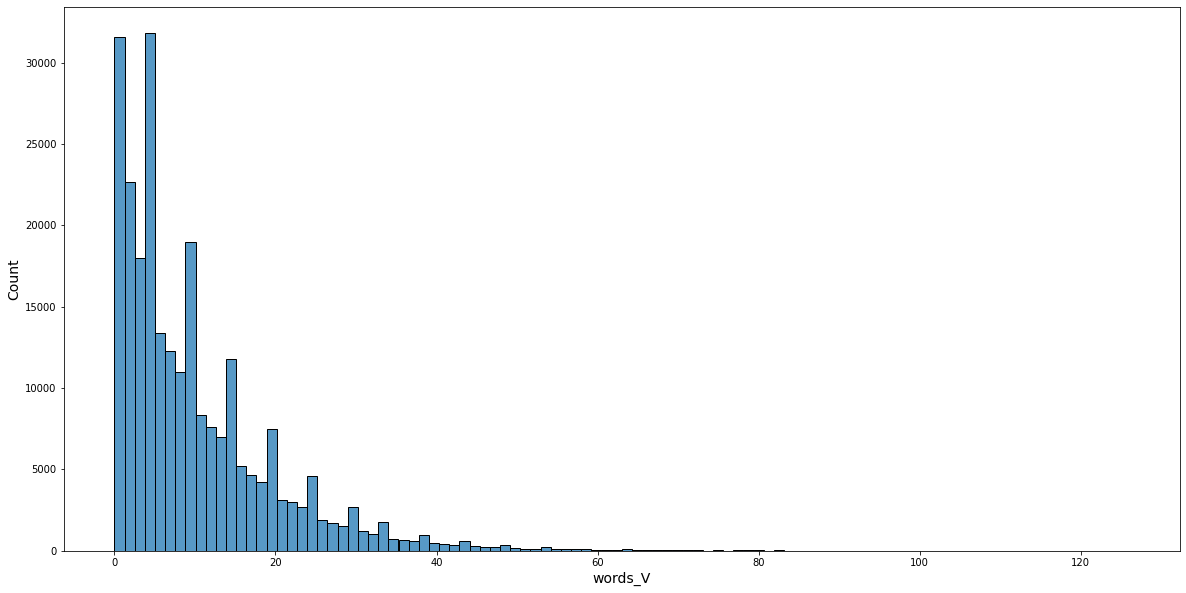

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('words_V', fontsize=14, color='black')
plt.ylabel('Count', fontsize=14, rotation=90, color='black')
sns.histplot(df['words_V'], bins=100);

# Inspect the signal in the predictor-points

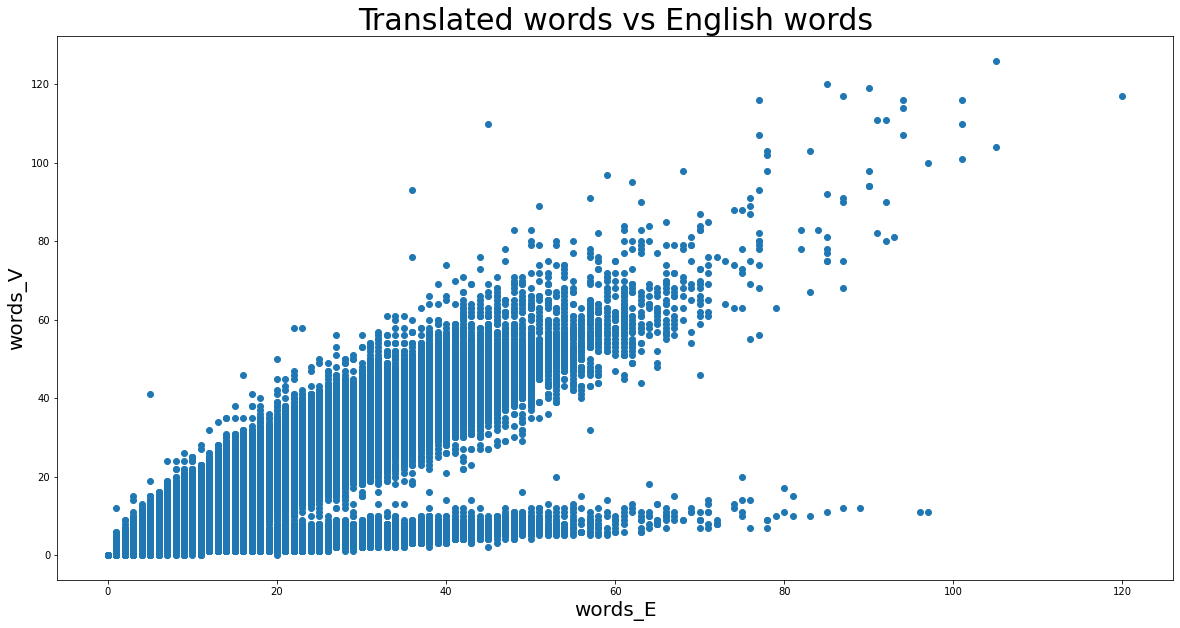

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Translated words vs English words', fontsize=30, color='black')
plt.xlabel('words_E', fontsize=20, color='black')
plt.ylabel('words_V', fontsize=20, rotation=90, color='black')
# fig = plt.gcf()
pc = plt.scatter(x='words_E', y='words_V', data=df)


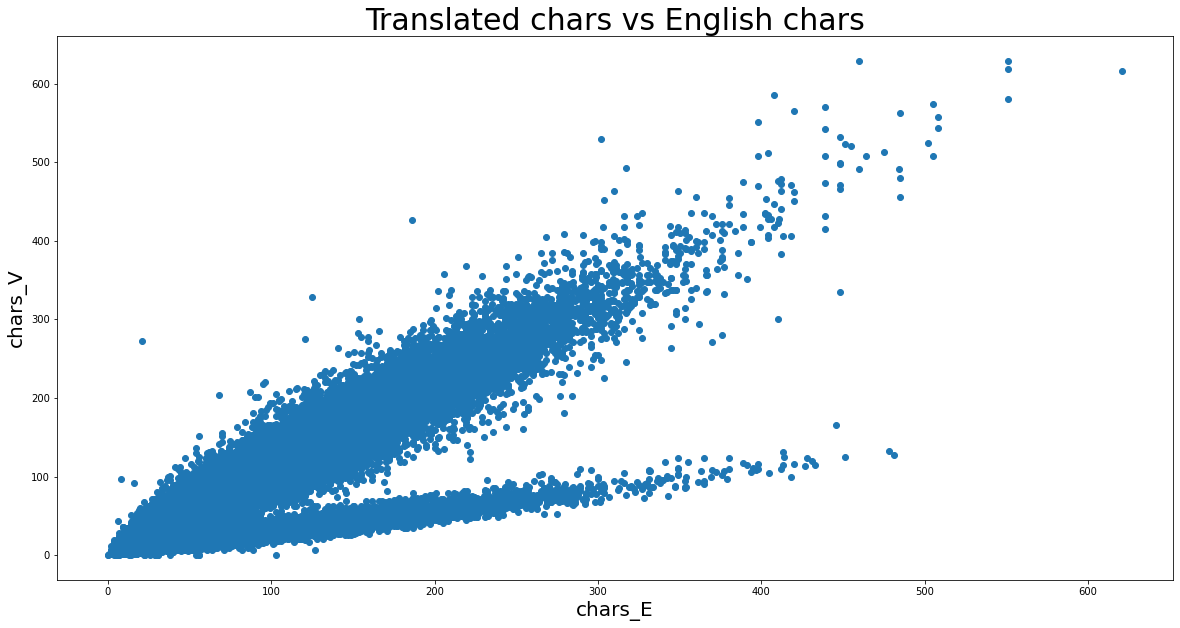

In [ ]:
#try instead to relate chars, rather than wc
plt.figure(figsize=(20,10))
plt.title('Translated chars vs English chars', fontsize=30, color='black')
plt.xlabel('chars_E', fontsize=20, color='black')
plt.ylabel('chars_V', fontsize=20, rotation=90, color='black')
# fig = plt.gcf()
pc = plt.scatter(x='chars_E', y='chars_V', data=df)

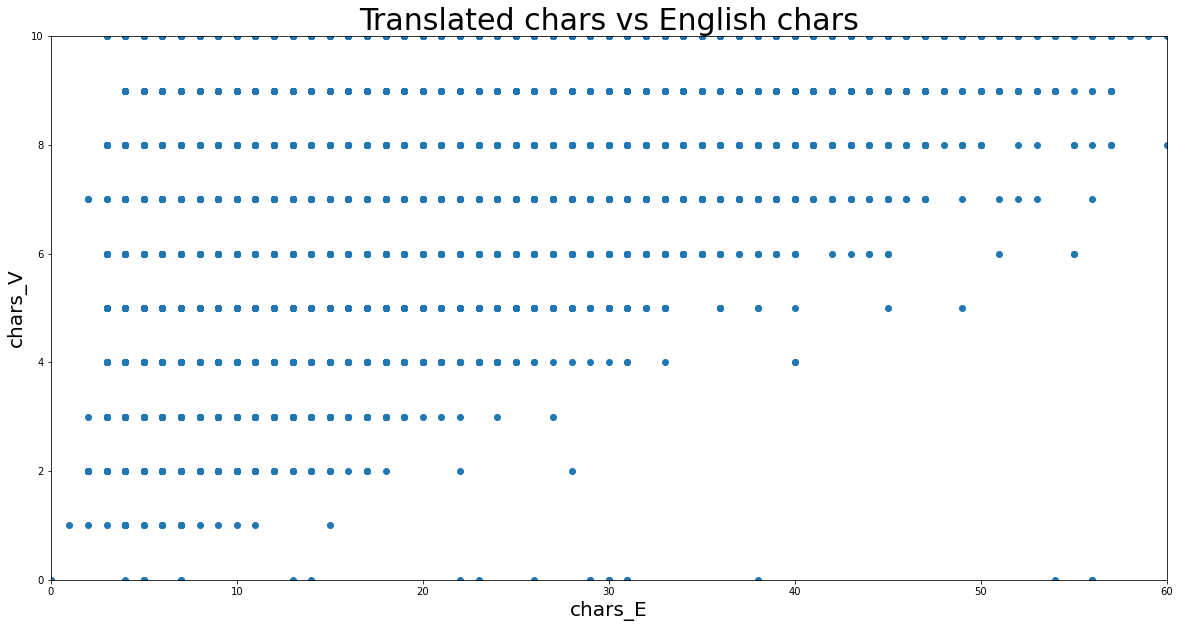

In [ ]:
# zoom
plt.figure(figsize=(20,10))
plt.title('Translated chars vs English chars', fontsize=30, color='black')
plt.xlabel('chars_E', fontsize=20, color='black')
plt.ylabel('chars_V', fontsize=20, rotation=90, color='black')
# fig = plt.gcf()
plt.xlim((0,60))
plt.ylim((0,10))
# pc = plt.scatter(x='chars_E', y='chars_C', data=df_joind_ddupd_aggd_reixd_EC)
pc = plt.scatter(x='chars_E', y='chars_V', data=df)

In [ ]:
#BEM outlier
df[(df['chars_E']<25) & (df['chars_V']>200)]

,m_descriptor,t_lan_E,t_version,s_rsen,c_id,e_content_E,chars_E,words_E,t_lan_V,e_top,be_top,c_created_at,c_created_at_count,c_kind,c_base,a_role,u_name,e_content_V,chars_V,words_V
195616,1965-0822x,ENG,18-0101,1,130771,Let us bow our heads.,21,5,BEM,T,NaN,2018-07-16 07:47:15.922454,1,V,c,TE,davmwa,"Natukontamike imitwe yesu. Shikulu Yesu, ka Cema wa mukuni mukalamba,Ifye natukwata imisha ishingi kuli Imwe,Shikulu, isho ifwe ta twa katale lipila pa citemwiko ico mwabika mu mitima Yesu. Ifwe tuleufwa abashalinga ilyo tunkontamike imitwe yesu no kwiminina mumulola Wenu.",273,41


In [ ]:
#POR outlier
df[(df['chars_E']<10) & (df['chars_V']>90)]

,m_descriptor,t_lan_E,t_version,s_rsen,c_id,e_content_E,chars_E,words_E,t_lan_V,e_top,be_top,c_created_at,c_created_at_count,c_kind,c_base,a_role,u_name,e_content_V,chars_V,words_V
3245,1949-0718,ENG,15-0901,458,2252,Spastic.,8,1,POR,T,N,2020-02-08 17:24:56.197187,1,V,c,CE,pausil,Espasmódico. [Pessoa que sofre de paralisia cerebral com espasmos musculares acentuados. - Trad.],97,12


In [ ]:
#CHN does not work for words
df[df['t_lan_V']=='CHN']

,m_descriptor,t_lan_E,t_version,s_rsen,c_id,e_content_E,chars_E,words_E,t_lan_V,e_top,be_top,c_created_at,c_created_at_count,c_kind,c_base,a_role,u_name,e_content_V,chars_V,words_V
9295,1951-0508,ENG,19-0201,1,634231,Faith Is The Substance,22,4,CHN,M,M,2019-07-08 16:15:48.468578,1,V,a,TE,dawnxu,信心是实底,5,1
9296,1951-0508,ENG,19-0201,2,634232,"Thank you Brother …?… No, I won’t have any discernments …?… Good evening, friends.",82,13,CHN,M,M,2019-07-08 16:18:44.215942,1,V,a,TE,dawnxu,谢谢你，弟兄。不，我不想有辨明人心的事。晚上好，朋友们。,28,6
9297,1951-0508,ENG,19-0201,3,634233,"We’re happy to be back again this afternoon to—this evening, rather, to have this night of the minister’s night that I’ve been promising you all along.",151,30,CHN,M,M,2019-07-08 16:20:18.724395,1,V,a,TE,dawnxu,我们很高兴今天下午又回来，哦，是今天晚上，把今晚作为传道人的晚上，这事我已经答应你们大家了。,46,5
9298,1951-0508,ENG,19-0201,4,634234,"And we’re sorry that tomorrow night is our last night, but I … We just have to go on.",85,19,CHN,M,N,2019-07-08 16:22:11.989362,1,V,c,TE,dawnxu,很抱歉明晚是我们最后的晚上，但我……我们必须要继续前行。,28,3
9299,1951-0508,ENG,19-0201,5,634235,"I just met the—another man that’s to come in after tomorrow night, the Reverend Mr. King.",89,18,CHN,M,M,2019-07-08 16:22:28.776016,1,V,a,TE,dawnxu,我刚遇见了明晚以后要上来这里的另一个人，就是该隐牧师。,27,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81915,1961-0520,ENG,19-0401,1569,538408,What do you do?),16,4,CHN,M,N,2019-12-05 04:38:16.764352,1,V,c,TE,weiwei,你会怎么做？）,7,1
81917,1961-0520,ENG,19-0401,1570,538409,Just breathe that holy name in prayer.,38,7,CHN,M,N,2019-12-05 04:38:32.692169,1,V,c,TE,weiwei,呼吸这名在心间。,8,1
81919,1961-0520,ENG,19-0401,1571,538410,Precious name …,16,2,CHN,M,N,2019-12-05 04:38:54.200703,1,V,c,TE,weiwei,宝贵名，,4,1
81921,1961-0520,ENG,19-0401,1572,538411,"Pastor, your audience now.",26,4,CHN,M,N,2019-12-05 04:39:10.852391,1,V,c,TE,weiwei,牧师，会众们，,7,2


In [ ]:
#chars_V=0 outliers
df_joind_EV[df_joind_EV['chars_V']==0]

,m_descriptor,t_lan_E,t_version,s_rsen,c_id,e_content_E,chars_E,words_E,t_lan_V,e_top,be_top,c_created_at,c_created_at_count,c_kind,c_base,a_role,u_name,e_content_V,chars_V,words_V
15724,1953-0405s,ENG,19-0201,1102,600158,[Brother Branham knocks on the pulpit six times — Ed.],54,9,CHN,M,M,2019-06-11 09:12:28.088006,1,V,a,TE,dawnxu,,0,0
15775,1953-0405s,ENG,19-0201,1153,600209,[Brother Branham knocked on the pulpit five times — Ed.],56,9,CHN,M,M,2019-06-15 03:25:11.855078,1,V,a,TE,dawnxu,,0,0
30871,1955-1118,ENG,15-0401,18,116791,A tr …,7,2,CHN,M,M,2018-01-06 19:20:40.907983,1,V,a,TE,estzhe,,0,0
33361,1956-0805,ENG,15-0402,1176,454335,,0,0,CHN,M,M,2019-07-24 00:12:14.971666,1,V,a,TE,corche,,0,0
34819,1957-0114,ENG,19-0701,1204,854355,He …,5,1,CHN,M,M,2020-05-13 03:47:44.384779,1,V,a,TE,dawnxu,,0,0
35746,1957-0120x,ENG,19-0701,360,848741,[Brother Branham knocked on the pulpit six times. — Ed.],56,9,CHN,M,M,2020-02-01 06:08:24.434038,1,V,a,TE,dawnxu,,0,0
42964,1957-0419,ENG,15-0401,505,13306,,0,0,BEM,M,M,2019-05-31 07:05:46.896578,2,V,a,CE,marmwa,,0,0
54301,1960-0607,ENG,19-0401,123,682753,“What do I …,13,3,CHN,M,M,2019-08-20 13:16:51.415398,1,V,a,TE,dawnxu,,0,0
54625,1960-0607,ENG,19-0401,285,682915,"Now, that’s all there is to it.",31,8,CHN,M,M,2019-08-27 01:45:11.773081,1,V,a,TE,dawnxu,,0,0
55323,1960-0607,ENG,19-0401,634,683264,No.”,4,1,CHN,M,M,2019-09-01 02:36:08.515518,1,V,a,TE,dawnxu,,0,0


In [ ]:
#EVENTUALLY: remove rows where chars_V (which will become y) is 0; these are bad training examples
# df_joind_EV = df_joind_EV[df_joind_EV['chars_V']!=0]
# df_joind_EV

In [ ]:
#EVENTUALLY: verify gone
# df_joind_EV[df_joind_EV['chars_V']==0]

# Set y

In [ ]:
y = 'chars_V'

# Inspect the distribution of y=chars_V

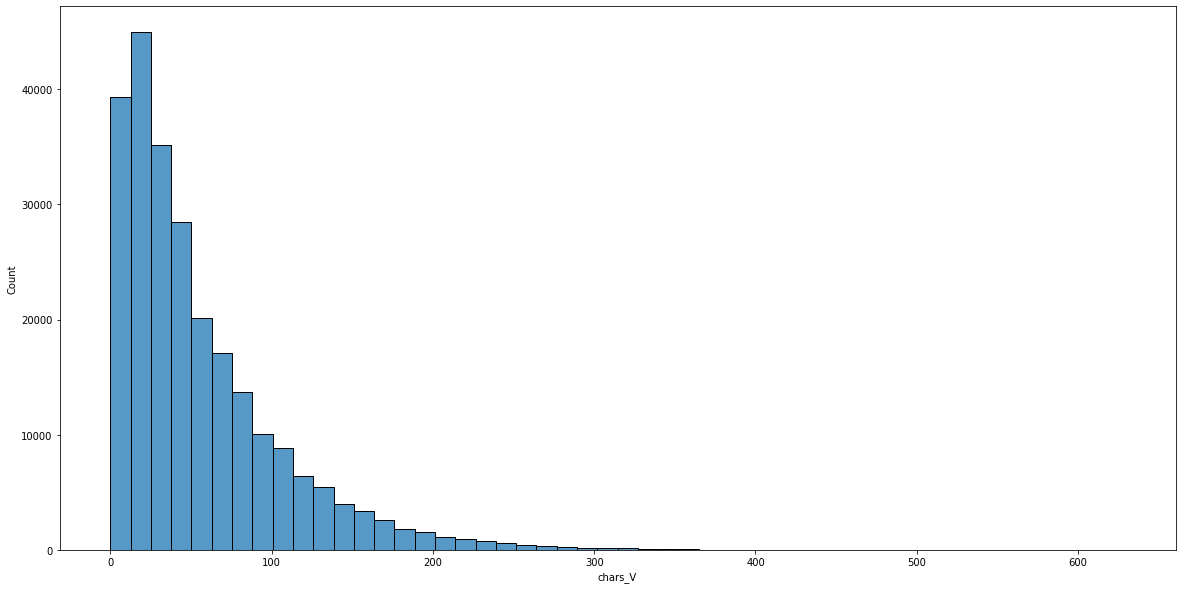

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(df[y], bins=50);

# Log-transform y

In [ ]:
df['log_chars_V'] = np.log(df['chars_V'] + 1)

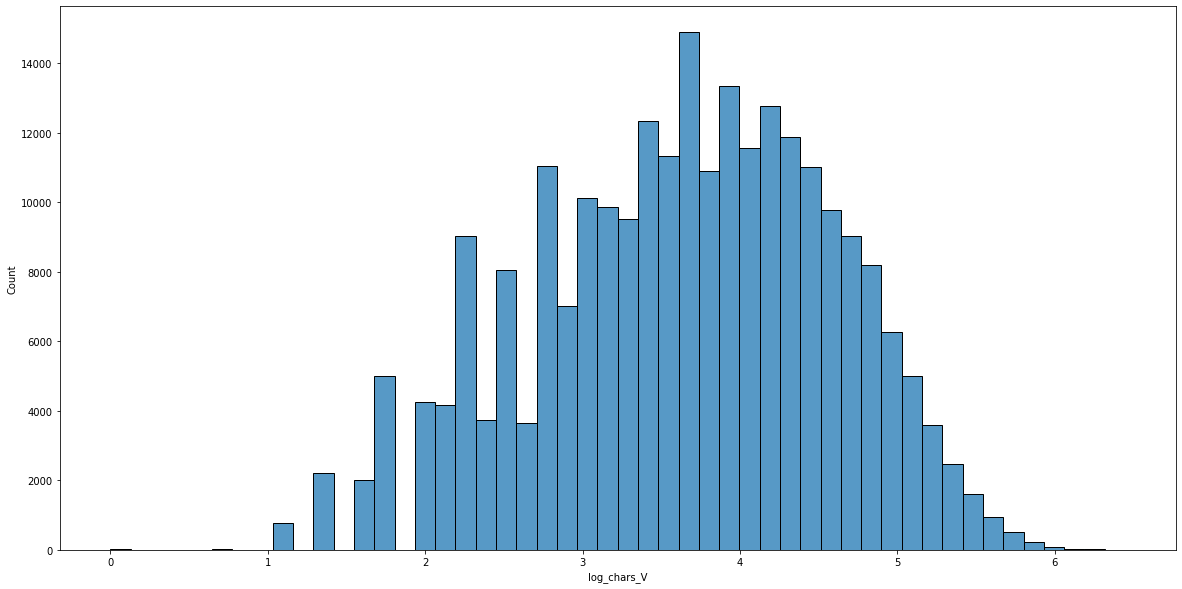

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(df['log_chars_V'], bins=50);

# Setup training

In [ ]:
procs = [Categorify, FillMissing, Normalize] #howard

In [ ]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df)); splits

((#198712) [222054,50029,71252,239684,46549,219533,135441,22157,113608,246251...],
 (#49677) [70378,78144,52985,214411,81085,34252,206193,149691,211401,75702...])

In [ ]:
# df.columns
print(*list(df.columns), sep='\n')

m_descriptor
t_lan_E
t_version
s_rsen
c_id
e_content_E
chars_E
words_E
t_lan_V
e_top
be_top
c_created_at
c_created_at_count
c_kind
c_base
a_role
u_name
e_content_V
chars_V
words_V
log_chars_V


In [ ]:
cats = ['t_lan_V']; conts = ['chars_E', 'words_E']

In [ ]:
logy = 'log_chars_V'

In [ ]:
pd.options.mode.chained_assignment = None
to = TabularPandas(df, procs=procs, cat_names=cats, cont_names=conts, y_names=logy, 
                  #  y_block=RegressionBlock(), 
                   splits=splits, inplace=True, reduce_memory=True)
to.show()

,t_lan_V,chars_E,words_E,log_chars_V
222054,SHO,222.0,42.0,5.288267
50029,CHN,84.0,16.0,3.258096
71252,LIN,67.0,14.0,4.369448
239684,FIJ,129.0,24.0,5.075174
46549,CHN,70.0,14.0,2.708050
219533,BEM,26.0,5.0,3.367296
135441,BEM,84.0,15.0,4.394449
22157,CHN,126.0,26.0,3.784190
113608,AFR,28.0,5.0,3.465736
246251,AFR,47.0,9.0,3.970292


In [ ]:
BS = 1024 #1024, 512, 256, 128, 64
dls = to.dataloaders(bs=BS)

In [ ]:
dls.show_batch()

,t_lan_V,chars_E,words_E,log_chars_V
0,AFR,6.000002,1.0,1.791759
1,AFR,10.000001,2.0,1.791759
2,CHN,23.999999,5.0,2.564949
3,CHN,14.000000,3.0,1.386294
4,AFR,43.000001,10.0,3.496508
5,GER,65.000000,11.0,4.234107
6,AFR,32.999999,7.0,3.713572
7,CHN,24.999999,6.0,2.772589
8,FIJ,13.000000,3.0,3.135494
9,GER,30.000000,5.0,3.433987


In [ ]:
# setup y_range
# np.min(df[logy]), np.max(df[logy])
# min_log_y = np.min(df[logy]); min_log_y
# max_log_y = np.max(df[logy])*1.2; max_log_y
# y_range = torch.tensor([min_log_y, max_log_y]); y_range

y = to.train.y
y.min(),y.max()

(0.0, 6.4457197189331055)

# Train model

## Without Hyper-Parameter-Optimization (HPO)

In [ ]:
# from fastai2.callback.all import EarlyStoppingCallback, SaveModelCallback
from fastai.callback.all import EarlyStoppingCallback, SaveModelCallback
learn = tabular_learner(dls=dls, 
                        layers=[500,250], 
                        config=tabular_config(
                            # ps=[.001, .01] 
                            # embed_p=0.04
                            y_range=(0, 6.5)),
                        metrics=[exp_rmspe]
                        # metrics=[r2_score, exp_rmspe],
                        # metrics=[mean_squared_error],
                        # ,wd=.01
                        # ,loss_func=MSELossFlat(),
                        ,n_out=1
                        ,loss_func=F.mse_loss,
                        #+,cbs=EarlyStoppingCallback(monitor='valid_loss', min_delta=0.01)
                        #+cbs=EarlyStoppingCallback(monitor='valid_loss', min_delta=0.001, patience=3),
                        )

SuggestedLRs(lr_min=0.003981071710586548, lr_steep=0.00010964782268274575)

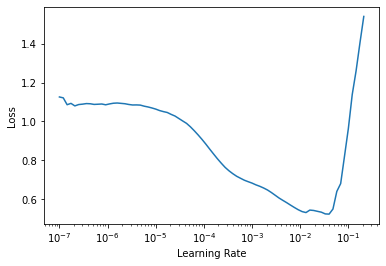

In [ ]:
learn.lr_find()

In [ ]:
! ls -ltrh {learn.path}/{learn.model_dir}

total 0


In [ ]:
callbacks = [
  SaveModelCallback(monitor='valid_loss', comp=np.less, min_delta=0.001, fname='best'),
  EarlyStoppingCallback(monitor='valid_loss', comp=np.less, min_delta=0.001, patience=3) #comp=np.greater
]
# learn.fit_one_cycle(n_epoch=20, lr_max=.02e-3)
learn.fit_one_cycle(n_epoch=20, lr_max=1e-3, cbs=callbacks)

epoch,train_loss,valid_loss,_exp_rmspe,time
0,0.051160,0.039813,0.228733,00:13
1,0.038999,0.035718,0.196083,00:13
2,0.043440,0.055260,0.223590,00:13
3,0.042650,0.036833,0.216538,00:15
4,0.040858,0.035896,0.217514,00:13


Better model found at epoch 0 with valid_loss value: 0.03981281444430351.
Better model found at epoch 1 with valid_loss value: 0.035718273371458054.
No improvement since epoch 1: early stopping


In [ ]:
! ls -ltrh {learn.path}/{learn.model_dir}/
! pwd

total 524K
-rw-r--r-- 1 root root 524K Oct 18 14:36 best.pth
/content


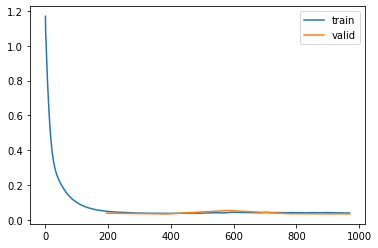

In [ ]:
# learn.recorder.plot_loss()
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [ ]:
res = learn.get_preds(with_input=True)
inputs,preds,targs = learn.get_preds(with_input=True)
# F.r_mse(preds, targs)

In [ ]:
# type(inputs)
# pd.Series(inputs)
inputs[0].squeeze()
#- inputs.squeeze()

tensor([9, 3, 2,  ..., 5, 5, 1])

In [ ]:
dfval = pd.DataFrame({'inputs':inputs[0].squeeze(), 'targs':inputs[0].squeeze(), 'preds':inputs[0].squeeze()})
dfval

,inputs,targs,preds
0,9,9,9
1,3,3,3
2,2,2,2
3,9,9,9
4,3,3,3
...,...,...,...
49672,1,1,1
49673,17,17,17
49674,5,5,5
49675,5,5,5


In [ ]:
learn.show_results()

,t_lan_V,chars_E,words_E,log_chars_V,log_chars_V_pred
0,3.0,-0.005324,0.018160,3.258096,2.873976
1,3.0,-0.650023,-0.626612,2.302585,2.261292
2,1.0,0.265033,0.448008,4.369448,4.375162
3,3.0,-0.254885,-0.411688,2.772589,2.654753
4,3.0,-0.816396,-0.734074,2.302585,2.046119
5,3.0,-0.587632,-0.626612,2.564949,2.323545
6,5.0,0.285830,0.125622,4.454347,4.476803
7,1.0,0.140253,-0.196764,4.060443,4.224612
8,2.0,0.098659,0.018160,4.304065,4.379907


In [ ]:
learn.recorder.show_results()

,t_lan_V,chars_E,words_E,log_chars_V,log_chars_V_pred
0,2.0,0.327423,0.233084,4.174387,4.518268
1,6.0,0.909732,0.770393,4.510859,4.646662
2,1.0,-1.024364,-1.056459,1.791759,2.300644
3,6.0,-0.587632,-0.411688,3.988984,3.545942
4,9.0,-0.670819,-0.841536,3.367296,3.312948
5,1.0,-0.566836,-0.734074,3.610918,3.479841
6,5.0,-0.670819,-0.734074,3.713572,3.514252
7,3.0,0.389813,0.662931,3.091043,3.163134
8,3.0,-1.003567,-1.163921,2.079442,1.499250


In [ ]:
learn.recorder.values

[(#2) [0.03564657270908356,0.18917681276798248]]

In [ ]:
trn_losses = [row[0] for row in learn.recorder.values]; trn_losses

[0.03564657270908356]

In [ ]:
val_losses = [row[1] for row in learn.recorder.values]; val_losses

[0.18917681276798248]

In [ ]:
learn.recorder.values

[(#2) [0.03564657270908356,0.18917681276798248]]

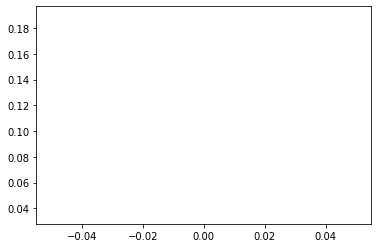

In [ ]:
plt.plot(trn_losses)
plt.plot(val_losses)

In [ ]:
#  (#3) [0.5396459698677063,0.6045629978179932,3.077817678451538],
best_epoch = np.argmin(val_losses)
ret = val_losses[best_epoch]
ret

0.18917681276798248

In [ ]:
trn_losses = [row[0] for row in learn.recorder.values]
val_losses = [row[1] for row in learn.recorder.values]
best_epoch = np.argmin(val_losses); best_epoch

0

In [ ]:
type(dls)

fastai.tabular.data.TabularDataLoaders

In [ ]:
df.columns

Index(['m_descriptor', 't_lan_E', 't_version', 's_rsen', 'c_id', 'e_content_E',
       'chars_E', 'words_E', 't_lan_V', 'e_top', 'be_top', 'c_created_at',
       'c_created_at_count', 'c_kind', 'c_base', 'a_role', 'u_name',
       'e_content_V', 'chars_V', 'words_V', 'log_chars_V'],
      dtype='object')

In [ ]:
x0 = pd.DataFrame({
    'chars_E':[20], #chars
    'wc_E':[5], #words
    't_lan_C':['AFR'],
    })
full_dec,dec,out = learn.predict(x0.iloc[0]); out

KeyError: ignored

In [ ]:
# out
out.numpy()[0]
# float(out.data[0])

3.1100929

In [ ]:
# type(prd)
print(np.exp( out.numpy()[0] ), 'translated chars ...')

22.423126 translated chars ...


# Inference with validation data

In [ ]:
# %debug
tmp = learn.get_preds(
    # ds_type=DatasetType.Train,
    ds_type=DatasetType.Valid,
    #ds_type=DatasetType.Test[0],
    with_loss=True); type(tmp),len(tmp)

NameError: ignored

In [ ]:
tmp = learn.get_preds(); tmp

(tensor([[3.5538],
         [4.6666],
         [2.9208],
         ...,
         [5.1425],
         [3.4644],
         [3.4176]]), tensor([[3.7377],
         [4.8363],
         [3.1781],
         ...,
         [4.9053],
         [3.6376],
         [3.7612]]))

In [ ]:
#//////////////////////////////////////

In [ ]:
# topcounts = df_V['e_top'].value_counts(); topcounts

In [ ]:
# plt.figure(figsize=(10,5))
# sns.barplot(x=topcounts.index, y=topcounts.values, alpha=0.8)
# plt.title('Distribution of e_top values')
# plt.ylabel('Number of Occurrences', fontsize=12)
# plt.xlabel('e_top values', fontsize=12)
# plt.show();